### Imports

In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 


### Get images and labels for training

In [25]:
def get_data(data_path):
    """
    Takes file path to OCR_dataset, and returns data ready to use as 
    (X, y) tuple of numpy arrays
    """
    images = []
    labels = []

    dir_list = os.listdir(data_path)
    for i in dir_list:
        dir = os.path.join(data_path, i)
        file_list = os.listdir(dir)
        for j in file_list:
            files = os.path.join(dir, j)
            img = cv2.imread(files)
            img = cv2.resize(img, (64,64))
            img = np.array(img, dtype=np.float32)
            img = img/255
            images.append(img)
            labels.append(i)

    X = np.array(images)
    y = np.array(labels)

    return (X, y)

### Label, Shuffle, Build Model

In [18]:
# Get Data
training_path = 'OCR_dataset/data/training_data'
X, y = get_data(training_path)

# Label
le = LabelEncoder()
y = le.fit_transform(y)

# Shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

# Build Model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile and Train

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=16, epochs=10)


Epoch 1/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.6263 - loss: 1.3798 - val_accuracy: 0.9312 - val_loss: 0.2409
Epoch 2/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9367 - loss: 0.1966 - val_accuracy: 0.9418 - val_loss: 0.1863
Epoch 3/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9548 - loss: 0.1342 - val_accuracy: 0.9581 - val_loss: 0.1417
Epoch 4/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9641 - loss: 0.0998 - val_accuracy: 0.9491 - val_loss: 0.1511
Epoch 5/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9686 - loss: 0.0842 - val_accuracy: 0.9537 - val_loss: 0.1701
Epoch 6/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9748 - loss: 0.0655 - val_accuracy: 0.9636 - val_loss: 0.1330
Epoch 7/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9739 - loss: 0.0653 - val_accuracy: 0.9624 - val_loss: 0.1555
Epoch 8/10
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9785 -

### Analyze Training Results

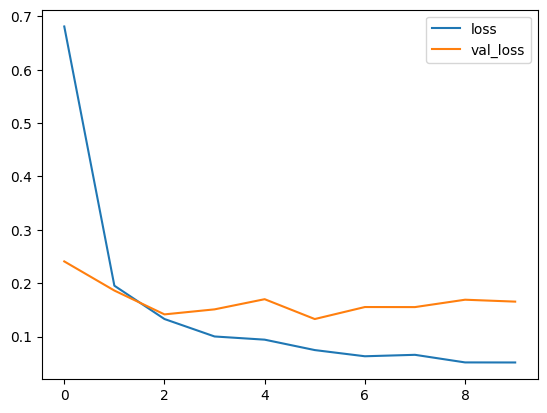

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])


### Run testing data

In [26]:

# Get Data
testing_path = 'OCR_dataset/data/testing_data'
X_test, y_test = get_data(testing_path)

# Make Predictions
preds = model.predict(X_test)
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


### Visualize Prediction Results

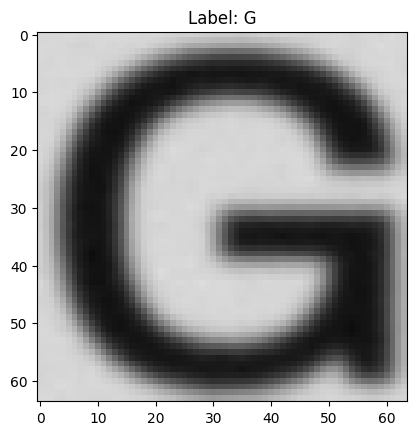

In [32]:
plt.imshow(X_test[197])
plt.title(f"Label: {predicted_labels[197]}")
plt.show()

In [33]:
y_test = le.fit_transform(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9848 - loss: 0.0545
Test Accuracy: 0.9811508059501648
